## Observations and Insights 

- Propriva had the least number of mice tested (i.e. 148), of all regimens available
- Male mice (51%) were the most were found to be in the majority of mice tested, by 2%
- Capomulin and Ramicane drug regimens performed the best of the following: Capomulin, Ramicane, Infubinol, and Ceftamin
- Mouse b128 (of the Capomulin group) tumor volume decreased by 8 mm3
- There appears to be a fairly strong positive correlation (.84) between average mouse weight and tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on = 'Mouse ID', how="outer")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
num_mice = merge_df['Mouse ID'].nunique()
num_mice

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dupes_search = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
dupes_search

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
newnum_mice = clean_df['Mouse ID'].nunique()
newnum_mice

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_group = clean_df.groupby('Drug Regimen')
means = regimen_group.mean()['Tumor Volume (mm3)']
medians = regimen_group.median()['Tumor Volume (mm3)']
variances = regimen_group.var()['Tumor Volume (mm3)']
stdevs = regimen_group.std()['Tumor Volume (mm3)']
sems = regimen_group.sem()['Tumor Volume (mm3)']
sum_stats_df = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Std. Dev.": stdevs,
    "Tumor Volume Std. Err.": sems
})
sum_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

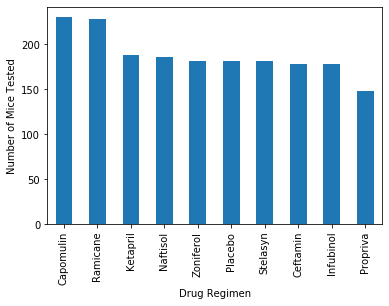

In [38]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
clean_df['Drug Regimen'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')

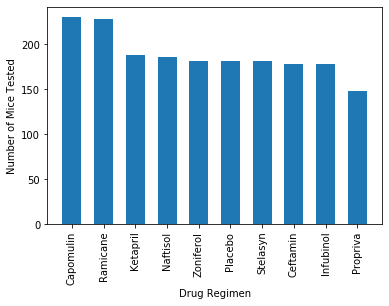

In [47]:
# Generate identical bar plot using pyplot instead of pandas.
drugreg_counts = clean_df['Drug Regimen'].value_counts()
plt.bar(drugreg_counts.index,drugreg_counts.values, width = .6)
plt.xticks(rotation = 90)
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.show()

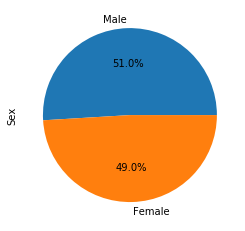

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df['Sex'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = [0,0])

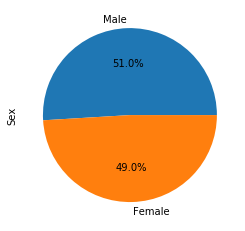

In [72]:
# Generate identical pie plot using pyplot
plt.pie(x = clean_df['Sex'].value_counts().values, labels = clean_df['Sex'].value_counts().index, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the
# treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = clean_df.loc[(clean_df['Drug Regimen'] =='Capomulin')|
                             (clean_df['Drug Regimen'] =='Ramicane')|
                             (clean_df['Drug Regimen'] =='Infubinol')|
                             (clean_df['Drug Regimen'] =='Ceftamin'), :]
four_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [20]:
# Calculate the final tumor volume of each mouse across four of the
# treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = clean_df.loc[(clean_df['Drug Regimen'] =='Capomulin')|
                             (clean_df['Drug Regimen'] =='Ramicane')|
                             (clean_df['Drug Regimen'] =='Infubinol')|
                             (clean_df['Drug Regimen'] =='Ceftamin'), :]
# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = four_regimens.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume
# at the last timepoint
new_merged_df = pd.merge(four_regimens, great_timepoint, on = 'Mouse ID',
                         how="outer")
new_merged_df = new_merged_df.rename(columns={"Timepoint_y":"Greatest Timepoint"})
new_merged_df

#Sort df
sorted_merged_df = new_merged_df.sort_values(['Mouse ID','Timepoint_x'], ascending = True)
sorted_merged_df
#Create DataFrame of last time points 
last_df = sorted_merged_df.loc[sorted_merged_df['Timepoint_x'] == sorted_merged_df['Greatest Timepoint']]
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Greatest Timepoint
463,a203,Infubinol,Female,20,23,45,67.973419,2,45
473,a251,Infubinol,Female,21,25,45,65.525743,1,45
483,a275,Ceftamin,Female,20,28,45,62.999356,3,45
327,a411,Ramicane,Male,3,22,45,38.407618,1,45
430,a444,Ramicane,Female,10,25,45,43.047543,0,45
...,...,...,...,...,...,...,...,...,...
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
124,y793,Capomulin,Male,17,17,45,31.896238,2,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45
84,z578,Ramicane,Male,11,16,45,30.638696,0,45


In [22]:
#Created DataFrames for each of the Four Drug Regimens in last_df
capomulin_mice = last_df.loc[last_df['Drug Regimen'] == 'Capomulin']
ceftamin_mice = last_df.loc[last_df['Drug Regimen'] == 'Ceftamin']
infubinol_mice = last_df.loc[last_df['Drug Regimen'] == 'Infubinol']
ramicane_mice = last_df.loc[last_df['Drug Regimen'] == 'Ramicane']

#Capomulin calculations for:  Quartiles, IQR, and Lower/Upper bounds
cap_volumes = capomulin_mice['Tumor Volume (mm3)']
cap_quartiles = cap_volumes.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_median = cap_quartiles[0.5]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

#Ceftamin calculations for:  Quartiles, IQR, and Lower/Upper bounds
cef_volumes = ceftamin_mice['Tumor Volume (mm3)']
cef_quartiles = cef_volumes.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_median = cef_quartiles[0.5]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

#Infubinol calculations for:  Quartiles, IQR, and Lower/Upper bounds
inf_volumes = infubinol_mice['Tumor Volume (mm3)']
inf_quartiles = inf_volumes.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_median = inf_quartiles[0.5]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

#Ramicane calculations for:  Quartiles, IQR, and Lower/Upper bounds
ram_volumes = ramicane_mice['Tumor Volume (mm3)']
ram_quartiles = ram_volumes.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_median = ram_quartiles[0.5]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

#Print out calculation results
print(f'The Capomulin regimen contains the following quartiles,\n'
      f'lower quartile: {cap_lowerq.round(2)}, median: {cap_median.round(2)},\n'
      f'upper quartile: {cap_upperq.round(2)}. The IQR was found to be: {cap_iqr.round(2)},\n'
      f'with this we were able to to determine that any outliers would be\n'
      f'found below, {cap_lower_bound.round(2)} and above, {cap_upper_bound.round(2)}.\n'
     f'----------------------------------------------------------------\n'
     f'The Ceftamin regimen contains the following quartiles,\n'
      f'lower quartile: {cef_lowerq.round(2)}, median: {cef_median.round(2)},\n'
      f'upper quartile: {cef_upperq.round(2)}. The IQR was found to be: {cef_iqr.round(2)},\n'
      f'with this we were able to to determine that any outliers would be\n'
      f'found below, {cef_lower_bound.round(2)} and above, {cef_upper_bound.round(2)}.\n'
     f'----------------------------------------------------------------\n'
     f'The Infubinol regimen contains the following quartiles,\n'
      f'lower quartile: {inf_lowerq.round(2)}, median: {inf_median.round(2)},\n'
      f'upper quartile: {inf_upperq.round(2)}. The IQR was found to be: {inf_iqr.round(2)},\n'
      f'with this we were able to to determine that any outliers would be\n'
      f'found below, {inf_lower_bound.round(2)} and above, {inf_upper_bound.round(2)}.\n'
     f'----------------------------------------------------------------\n'
     f'The Ramicane regimen contains the following quartiles,\n'
      f'lower quartile: {ram_lowerq.round(2)}, median: {ram_median.round(2)},\n'
      f'upper quartile: {ram_upperq.round(2)}. The IQR was found to be: {ram_iqr.round(2)},\n'
      f'with this we were able to to determine that any outliers would be\n'
      f'found below, {ram_lower_bound.round(2)} and above, {ram_upper_bound.round(2)}.\n'
     f'----------------------------------------------------------------\n')


The Capomulin regimen contains the following quartiles,
lower quartile: 32.38, median: 38.13,
upper quartile: 40.16. The IQR was found to be: 7.78,
with this we were able to to determine that any outliers would be
found below, 20.7 and above, 51.83.
----------------------------------------------------------------
The Ceftamin regimen contains the following quartiles,
lower quartile: 48.72, median: 59.85,
upper quartile: 64.3. The IQR was found to be: 15.58,
with this we were able to to determine that any outliers would be
found below, 25.36 and above, 87.67.
----------------------------------------------------------------
The Infubinol regimen contains the following quartiles,
lower quartile: 54.05, median: 60.17,
upper quartile: 65.53. The IQR was found to be: 11.48,
with this we were able to to determine that any outliers would be
found below, 36.83 and above, 82.74.
----------------------------------------------------------------
The Ramicane regimen contains the following quartiles

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [28]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

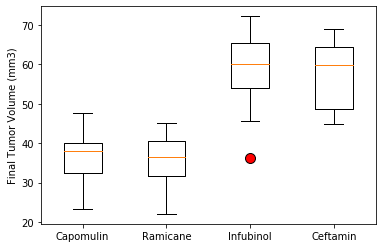

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
# Example outlier plot of reaction times
box_plot_data = []
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for treatment in treatment_list:
    treatment_df = last_df.loc[last_df['Drug Regimen'] == treatment]
    volumes = treatment_df['Tumor Volume (mm3)']
    box_plot_data.append(volumes)
plt.boxplot(box_plot_data, labels = treatment_list, flierprops={'markerfacecolor': 'red', 'markersize': 10}, )
plt.xticks(rotation = 0)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

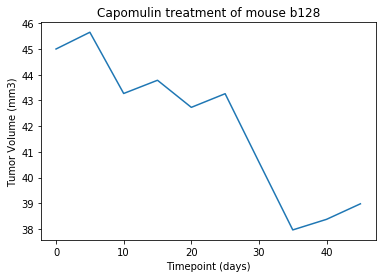

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
capomulin_mouse = new_merged_df[new_merged_df['Mouse ID'] == 'b128']
plt.plot(capomulin_mouse['Timepoint_x'], capomulin_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse b128')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

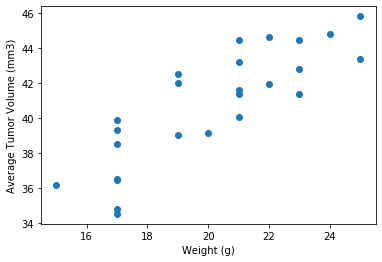

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cap_df = new_merged_df[new_merged_df['Drug Regimen'] == 'Capomulin']
avg_cap_df = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_cap_df['Weight (g)'], avg_cap_df['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is, 0.84


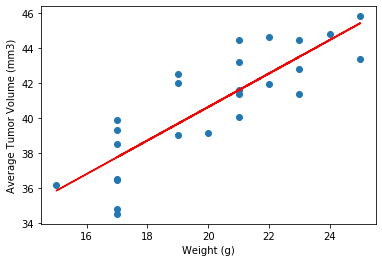

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_cap_df['Weight (g)']
tumor_volume = avg_cap_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
plt.scatter(weight, tumor_volume)
plt.plot(weight, regress_values, 'r-')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()

# Observations and Insights